In [ ]:
import pandas as pd

train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

train_data.head()   

In [ ]:
print(train_data.isnull().sum().sort_values(ascending=False).head(20))

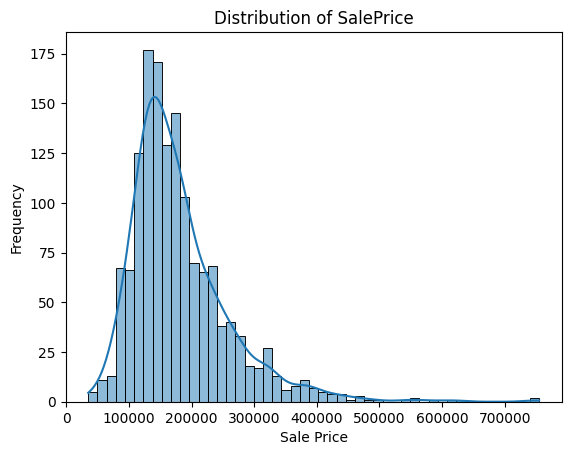

In [29]:
# Visualization of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Fill missing values
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
    else:
        train_data[column] = train_data[column].fillna(train_data[column].median())

for column in test_data.columns:
    if test_data[column].dtype == 'object':
        test_data[column] = test_data[column].fillna(test_data[column].mode()[0])
    else:
        test_data[column] = test_data[column].fillna(test_data[column].median())


In [ ]:
# Simple Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Selecting numerical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
X = train_data[numerical_features]
y = train_data['SalePrice']

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_val)
rmse = sqrt(mean_squared_error(y_val, predictions))
print(f"RMSE: {rmse}")

In [ ]:
# Prepare the test data
X_test = test_data[numerical_features]

# Make predictions
test_predictions = model.predict(X_test)

# Create submission file
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file created.")


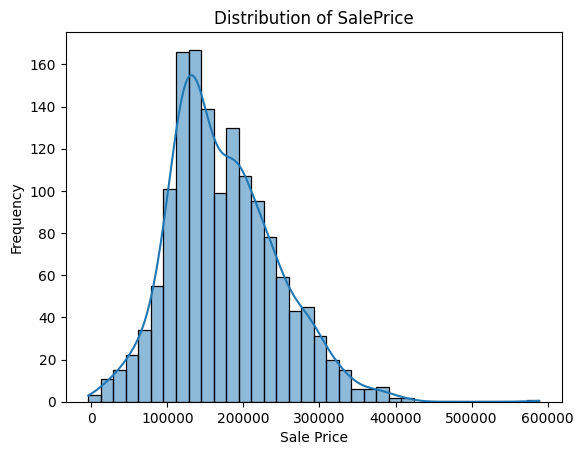

In [30]:
# Visualization of the target variable in the submission file
submission_data = pd.read_csv('submission.csv')

sns.histplot(submission_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()